# Algoritmul HillClimbing in Python
Pentru problema celor N regine

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calculeaza_calitate(asezare_regine):
    """
    Funcția obiectiv pentru problema reginelor - calculează câte perechi de regine nu se atacă

    Parametri:
    asezare_regine - permutarea care reprezintă așezarea reginelor (poziția i reprezintă coloana,
                     valoarea asezare_regine[i] reprezintă rândul pe care se află regina)

    Returnează:
    calitate - numărul de perechi de regine care nu se atacă pe diagonală
    """
    numar_regine = len(asezare_regine)
    # Numărul maxim de perechi de regine care nu se atacă (dacă nicio pereche nu s-ar ataca)
    calitate = numar_regine * (numar_regine - 1) / 2

    # Verificăm atacurile pe diagonală (atacurile pe linii și coloane sunt eliminate prin natura permutării)
    for i in range(numar_regine):
        for j in range(i + 1, numar_regine):
            # Verificăm dacă reginele se atacă pe diagonală
            if abs(i - j) == abs(asezare_regine[i] - asezare_regine[j]):
                calitate = calitate - 1

    return calitate

In [4]:
def genereaza_vecini(permutare):
    """
    Generează toate permutările vecine prin aplicarea câte unei transpozitii

    Parametri:
    permutare - permutarea curentă de regine

    Returnează:
    lista_vecini - lista de permutări vecine obținute prin transpozițiile tuturor perechilor posibile

    Notă: O transpozitie înseamnă că reginele din pozițiile (i, permutare[i]) și (j, permutare[j])
    sunt mutate în pozițiile (i, permutare[j]) respectiv (j, permutare[i])
    """
    lista_vecini = []
    numar_regine = len(permutare)

    # Generăm toate transpozițiile posibile (schimbarea a două regine)
    for i in range(numar_regine):
        for j in range(i + 1, numar_regine):
            permutare_vecina = permutare.copy()
            # Schimbăm pozițiile reginelor i și j
            permutare_vecina[i] = permutare[j]
            permutare_vecina[j] = permutare[i]
            lista_vecini.append(permutare_vecina)

    return lista_vecini

In [6]:
def vizualizeaza_solutie(solutie):
    """
    Vizualizează așezarea reginelor pe tabla de șah

    Parametri:
    solutie - permutarea care definește așezarea reginelor
    """
    numar_regine = len(solutie)

    # Creăm figura
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()

    # Adăugăm regine pe tabla de șah
    x = [i + 0.5 for i in range(numar_regine)]
    y = [solutie[i] + 0.5 for i in range(numar_regine)]

    # Desenăm tabla de șah
    for i in range(numar_regine):
        for j in range(numar_regine):
            culoare = 'white' if (i + j) % 2 == 0 else 'gray'
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color=culoare))

    # Plasăm reginele
    plt.plot(x, y, 'ro', markersize=15, label='Regine')

    # Adăugăm detalii la grafic
    plt.xticks(range(numar_regine + 1))
    plt.yticks(range(numar_regine + 1))
    plt.grid(True, which='both', color='k', linestyle='-', linewidth=1)
    plt.title(f'Așezarea optimă pentru {numar_regine} regine')
    ax.set_aspect('equal')
    plt.legend()

    plt.show()

Succes! Cea mai bună permutare găsită este corectă!
Cea mai bună așezare găsită are valoarea: 28.0
Cea mai bună permutare găsită este: [5, 2, 0, 6, 4, 7, 1, 3]


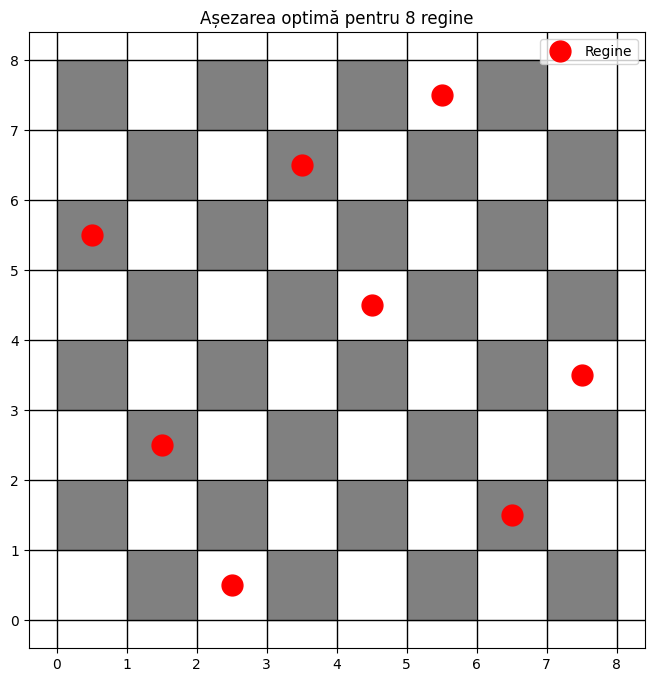

In [7]:
def hill_climbing_regine(numar_regine, numar_maxim_iteratii):
    """
    Implementarea algoritmului Hill Climbing pentru rezolvarea problemei reginelor

    Parametri:
    numar_regine - numărul de regine de plasat pe tablă
    numar_maxim_iteratii - numărul maxim de iterații (puncte de start)

    Returnează:
    permutare_optima - cea mai bună permutare obținută
    calitate_optima - calitatea permutării obținute (numărul de perechi de regine care nu se atacă)

    Exemple de apel:
    permutare, calitate = hill_climbing_regine(8, 2)
    permutare, calitate = hill_climbing_regine(14, 5)
    permutare, calitate = hill_climbing_regine(24, 10)
    """
    # Valoarea optimă cunoscută: toate perechile de regine nu se atacă
    calitate_maxima_posibila = numar_regine * (numar_regine - 1) / 2

    # Inițializăm cea mai bună soluție găsită
    calitate_optima = -1
    permutare_optima = None

    # Numărul de puncte de start încercate
    numar_iteratii = 0

    # Continuăm până la atingerea calității optime sau consumarea iterațiilor
    while calitate_optima < calitate_maxima_posibila and numar_iteratii < numar_maxim_iteratii:
        # Generăm o permutare aleatoare ca punct de start
        permutare_curenta = np.random.permutation(numar_regine).tolist()
        calitate_curenta = calculeaza_calitate(permutare_curenta)

        # Aplicăm algoritmul Hill Climbing pentru acest punct de start
        am_ajuns_la_maxim_local = False

        while not am_ajuns_la_maxim_local:
            # Generăm toți vecinii permutării curente
            vecini = genereaza_vecini(permutare_curenta)

            # Căutăm cel mai bun vecin
            calitate_maxima_vecin = -1
            pozitie_vecin_maxim = -1

            for i, vecin in enumerate(vecini):
                calitate_vecin = calculeaza_calitate(vecin)
                if calitate_vecin > calitate_maxima_vecin:
                    calitate_maxima_vecin = calitate_vecin
                    pozitie_vecin_maxim = i

            # Dacă cel mai bun vecin e mai bun decât punctul curent, el devine punct curent
            if calitate_maxima_vecin > calitate_curenta:
                permutare_curenta = vecini[pozitie_vecin_maxim]
                calitate_curenta = calitate_maxima_vecin
            else:
                # Am ajuns la un maxim local
                am_ajuns_la_maxim_local = True

        # Verificăm dacă acest maxim local este mai bun decât cel mai bun găsit până acum
        if calitate_curenta > calitate_optima:
            calitate_optima = calitate_curenta
            permutare_optima = permutare_curenta

        numar_iteratii += 1

    # Afișăm rezultatele
    if calitate_optima < calitate_maxima_posibila:
        print(f"Atenție: cea mai bună permutare găsită nu este corectă! {calitate_optima} < {calitate_maxima_posibila}")
    else:
        print("Succes! Cea mai bună permutare găsită este corectă!")

    print(f"Cea mai bună așezare găsită are valoarea: {calitate_optima}")
    print(f"Cea mai bună permutare găsită este: {permutare_optima}")

    # Vizualizăm soluția
    vizualizeaza_solutie(permutare_optima)

    return [permutare_optima, calitate_optima]

# exemplu apel
permutare, calitate = hill_climbing_regine(8, 5)